# Relative cost of matrix factorizations

In [2]:
import numpy as np
import numpy.linalg as npla
import scipy.linalg as spla

import matplotlib.pyplot as pt

from time import time

In [3]:
n_values = (10**np.linspace(1, 3.25, 15)).astype(np.int32)
n_values

array([  10,   14,   20,   30,   43,   63,   92,  133,  193,  279,  404,
        585,  848, 1228, 1778], dtype=int32)

-----> lu
10
14
20
30
43
63
92
133
193
279
404
585
848
1228
1778
-----> matmat
10
14
20
30
43
63
92
133
193
279
404
585
848
1228
1778
-----> svd
10
14
20
30
43
63
92
133
193
279
404
585
848
1228
1778


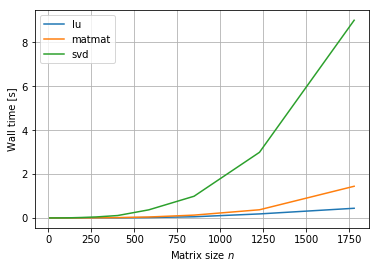

In [5]:
def matmat(A):
    A @ A

for name, f in [
        ("lu", spla.lu_factor),
        ("matmat", matmat),
        ("svd", npla.svd)
        ]:

    times = []
    print("----->", name)
    
    for n in n_values:
        print(n)

        A = np.random.randn(n, n)
        
        start_time = time()
        f(A)
        times.append(time() - start_time)
        
    pt.plot(n_values, times, label=name)

pt.grid()
pt.legend(loc="best")
pt.xlabel("Matrix size $n$")
pt.ylabel("Wall time [s]")

* The faster algorithms make the slower ones look bad. But... it's all relative.
* Is there a better way of plotting this?
* Can we see the asymptotic cost ($O(n^3)$) of these algorithms from the plot?